In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.set_loglevel('WARNING')

import os
import re
import datetime
from datetime import date
import time

# included code
import sys
sys.path.append('./mylib/')
import global_materials
from load import *
from sentiment_process import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nhan.ngothanh1\AppData\Roaming\nlt

#### Parameter Settings

In [2]:
# PARAMETER
today = date.today()
FROM_DATE = datetime.datetime(2022,4,1) # IMPORTANT: MUST set first day of next month if report for previous month (eg. report 10/2022, set TO_DATE 2022,11,1)
TO_DATE = datetime.datetime(2023,4,1)
MONTH_LIST = 0

In [3]:
#TO_DATE - datetime.timedelta(month=1)

In [4]:
LAST_MONTH = (TO_DATE - datetime.timedelta(days=25)).strftime("%Y-%m")
LAST_MONTH

'2023-03'

#### Data Collection

In [5]:
DATA_PATH = './data'
bank_array = ['vib1','vib2']


rw_android_src_dict = {'vib1':['com.vn.vib.mobileapp','vi','vn'],
                       'vib2':['com.vib.myvib2','vi','vn']
                       #'vib2':['com.vib.myvib2','en','us']
                       }
#----------------------------------------------------------------------------------------------------------
# get Android review
column = ['reviewId','userName','userImage','content','score','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt','bankapp','platform']
df_android_rw = pd.DataFrame(columns = column)

get_review_in = bank_array #rw_android_src_dict.keys()

for bank_name in get_review_in:
    Andrw_df = get_rwdata_android(rw_android_src_dict, bank_name, save_path=DATA_PATH)   
    Andrw_df['bankapp'] = bank_name
    Andrw_df['platform'] = 'android'
    df_android_rw = pd.concat([df_android_rw, Andrw_df])
    time.sleep(30)

#JUST RAW
df_android_used = df_android_rw[['userName','content','at','score','bankapp','platform']]
df_android_used.rename(columns = {'userName':'username','content':'review','at':'date','score':'rating'}, inplace=True)

# Convert timetamps to string
df_android_used['date'] = df_android_used['date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
print(df_android_used.shape)
df_android_used.head(1)

vib1: (5041, 10)
vib2: (3059, 10)
(8100, 6)


,username,review,date,rating,bankapp,platform
0,mai phong nha,Ok,2023-04-02 00:59:14,5,vib1,android


In [6]:
rw_ios_src_dict = {'vib1':['MyVIB','vn','949371011'],
                   'vib2':['MyVIB 2.0','vn','1626624790']
                  }
#----------------------------------------------------------------------------------------------------------
column = ['title','userName','isEdited','review','date','rating','developerResponse','bankapp','platform']
df_ios_rw = pd.DataFrame(columns = column)

get_review_in = bank_array #rw_ios_src_dict.keys()

for bankapp in get_review_in:
    iosrw_df = get_rwdata_ios(rw_ios_src_dict, bankapp, save_path=DATA_PATH) 
    #print(iosrw_df) 
    #sys.exit()
    iosrw_df['bankapp'] = bankapp
    iosrw_df['platform'] = 'ios'
    df_ios_rw = pd.concat([df_ios_rw, iosrw_df])  
    time.sleep(30)
    
#JUST RAW
df_ios_used = df_ios_rw[['userName','review','date','rating','bankapp','platform']]
df_ios_used.rename(columns = {'userName':'username'}, inplace=True)

# Convert timetamps to string
df_ios_used['date'] = df_ios_used['date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
df_ios_used


2023-04-03 09:50:48,390 [INFO] Base - Initialised: AppStore('vn', 'myvib', 949371011)
2023-04-03 09:50:48,393 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/vn/app/myvib/id949371011
2023-04-03 09:50:53,595 [INFO] Base - [id:949371011] Fetched 80 reviews (80 fetched in total)
2023-04-03 09:51:00,561 [INFO] Base - [id:949371011] Fetched 200 reviews (200 fetched in total)
2023-04-03 09:51:07,519 [INFO] Base - [id:949371011] Fetched 340 reviews (340 fetched in total)
2023-04-03 09:51:14,375 [INFO] Base - [id:949371011] Fetched 460 reviews (460 fetched in total)
2023-04-03 09:51:20,410 [INFO] Base - [id:949371011] Fetched 580 reviews (580 fetched in total)
2023-04-03 09:51:27,549 [INFO] Base - [id:949371011] Fetched 680 reviews (680 fetched in total)
2023-04-03 09:51:33,724 [INFO] Base - [id:949371011] Fetched 800 reviews (800 fetched in total)
2023-04-03 09:51:36,912 [INFO] Base - [id:949371011] Fetched 848 reviews (848 fetched in total)


vib1: (848, 7)


2023-04-03 09:52:09,771 [INFO] Base - Initialised: AppStore('vn', 'myvib-2-0', 1626624790)
2023-04-03 09:52:09,772 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/vn/app/myvib-2-0/id1626624790
2023-04-03 09:52:15,625 [INFO] Base - [id:1626624790] Fetched 100 reviews (100 fetched in total)
2023-04-03 09:52:22,730 [INFO] Base - [id:1626624790] Fetched 220 reviews (220 fetched in total)
2023-04-03 09:52:29,658 [INFO] Base - [id:1626624790] Fetched 340 reviews (340 fetched in total)
2023-04-03 09:52:36,550 [INFO] Base - [id:1626624790] Fetched 480 reviews (480 fetched in total)
2023-04-03 09:52:42,658 [INFO] Base - [id:1626624790] Fetched 600 reviews (600 fetched in total)
2023-04-03 09:52:49,132 [INFO] Base - [id:1626624790] Fetched 720 reviews (720 fetched in total)
2023-04-03 09:52:50,232 [INFO] Base - [id:1626624790] Fetched 733 reviews (733 fetched in total)


vib2: (733, 7)


,username,review,date,rating,bankapp,platform
0,Thuy1124,App dùng ổn. Đề nghị nhà phát triển thêm mục t...,2019-12-09 06:37:17,4,vib1,ios
1,Hanzien,Giờ bank nào người ta cũng cho báo biến động q...,2021-05-19 15:56:39,4,vib1,ios
2,ppppppwjbs,App dùng ổn. Cần thêm chức năng thông báo số d...,2021-05-13 06:35:31,3,vib1,ios
3,tui là Trung,Tuy app đã ổn định nhưng vẫn còn vài lỗi vặt c...,2019-12-19 06:32:32,5,vib1,ios
4,Là Loship đây,Đăng kí ngay khúc chụp hình bắt chụp đi chụp l...,2021-06-05 02:30:50,1,vib1,ios
...,...,...,...,...,...,...
728,VTT-HCM,Tính năng điều khiển bằng giọng nói và AR nghe...,2022-05-30 17:24:06,4,vib2,ios
729,khanh.nguyenquoc1,Nice,2022-05-29 16:39:52,5,vib2,ios
730,Po123!,"App dùng giao diện rất tẻ nhạt, tôi có cảm giá...",2023-04-01 18:00:52,2,vib2,ios
731,annatran01,Tại sao ngày nào mình cũng bị trừ 66k phí duy ...,2022-11-09 00:27:03,1,vib2,ios


In [7]:
df_review = pd.concat([df_android_used,df_ios_used])
df_review

,username,review,date,rating,bankapp,platform
0,mai phong nha,Ok,2023-04-02 00:59:14,5,vib1,android
1,Kiều Oanh BIDV,Vô trang Vay9 . C0M để vay 0% + kiếm 9 triệu,2023-04-01 12:33:56,5,vib1,android
2,Lan Anh,Kiếm tiền + vay 0% online vô ( VAY9 . C0M ),2023-04-01 11:06:55,5,vib1,android
3,Hoài Trinh,Vô trang VayTotNhat . C0M vay 0% + kiếm 9 triệu,2023-04-01 10:48:16,1,vib1,android
4,Ngọc Thúy Vy Nguyễn,OK verrgood,2023-04-01 01:07:34,5,vib1,android
...,...,...,...,...,...,...
728,VTT-HCM,Tính năng điều khiển bằng giọng nói và AR nghe...,2022-05-30 17:24:06,4,vib2,ios
729,khanh.nguyenquoc1,Nice,2022-05-29 16:39:52,5,vib2,ios
730,Po123!,"App dùng giao diện rất tẻ nhạt, tôi có cảm giá...",2023-04-01 18:00:52,2,vib2,ios
731,annatran01,Tại sao ngày nào mình cũng bị trừ 66k phí duy ...,2022-11-09 00:27:03,1,vib2,ios


In [8]:
from cleantext.sklearn import CleanTransformer

def check_ads(text): 
    cleaner = CleanTransformer(no_punct=False, lower=False)
    text = cleaner.transform([text])[0]
    #print('[1]',text)
    matched1 = re.match('([\w\:\% ]+)(\.)(([ ]*C0M)|([ ]*COM)|([ ]*vn))',text, flags=re.IGNORECASE)
    matched2 = re.match('Nguoi dung Google',text, flags=re.IGNORECASE)
    
    if matched1 or matched2:
        #print(text)
        #print(matched.groups())
        return True
        
    else:
        return False

In [9]:
#check_ads('Vay 0% tới 9tháng thì vô trang: 𝐕𝐚𝐲𝟗.𝐂𝟎𝐌 nè')

In [10]:
# dfxxx = pd.read_csv('./data/0_AndRaw_vib2_2023-02-07.csv', encoding='utf-8', index_col=False)

# dfxxx['review_check_ads'] = dfxxx['content'].apply(lambda x: check_ads(x))
# dfxxx['username_check_ads'] = dfxxx['userName'].apply(lambda x: check_ads(x))
# dfxxx = dfxxx[dfxxx['review_check_ads']==True]
# dfxxx

In [11]:
#df = pd.read_csv("../sentiment_analysis_external_review/data/train/0_AndRaw_vib1_2022-09-23.csv", index_col=False)

df_review['date'] = pd.to_datetime(df_review['date'])
#df['date_dt_my'] = pd.to_datetime(df['at'], format='%Y-%m')
df_review['date_my'] = df_review['date'].dt.strftime("%Y-%m")
#df_review_ios_vib10 = pd.read_csv("../sentiment_analysis_external_review/data/train/0_iOSRaw_vib1_2022-09-23.csv", index_col=False)
print(df_review.shape)

# df['month'] = pd.DatetimeIndex(df['at']).month
# df['year'] = pd.DatetimeIndex(df['at']).year
# df['m_y'] = df['month'].astype(str)+df['year'].astype(str)

#JUST RAW
#df_review = df_review[['userName','content','at','date_my','score']]
#df.rename(columns = {'userName':'username','content':'review','at':'date','score':'rating'}, inplace=True)
COLUMN = df_review.columns.values
df_review['review_check_ads'] = df_review['review'].apply(lambda x: check_ads(x))
print('There are {} ads review'.format(df_review[df_review['review_check_ads']==True].shape[0]))
df_review['username_check_ads'] = df_review['username'].apply(lambda x: check_ads(x))
print('There are {} username are Nguoi dung Google or web ads'.format(df_review[df_review['username_check_ads']==True].shape[0]))
df_review = df_review[df_review['review_check_ads']==False]
df_review = df_review[df_review['username_check_ads']==False]

df_review = df_review[COLUMN]
print('Remain number of customer: {}'.format(df_review.shape[0]))
df_review['review_adj'] = df_review['review'].apply(lambda x: review_vietnamese_adj(str(x).lower()))
df_review.head()


(9681, 7)
There are 74 ads review
There are 1539 username are Nguoi dung Google or web ads
Remain number of customer: 8089


,username,review,date,rating,bankapp,platform,date_my,review_adj
0,mai phong nha,Ok,2023-04-02 00:59:14,5,vib1,android,2023-04,okay
2,Lan Anh,Kiếm tiền + vay 0% online vô ( VAY9 . C0M ),2023-04-01 11:06:55,5,vib1,android,2023-04,kiếm tiền vay online vô
4,Ngọc Thúy Vy Nguyễn,OK verrgood,2023-04-01 01:07:34,5,vib1,android,2023-04,okay verrgood
5,Tan To,Update lên vib 2.0. Nhiều tính năng còn thua p...,2023-03-29 17:49:09,1,vib1,android,2023-03,update lên vib nhiều tính năng còn thua phiên ...
6,Ngọc Anh,Kiếm 1.000k free thì vào VAY9 . C0M,2023-03-29 10:10:21,5,vib1,android,2023-03,kiếm free thì vào


In [12]:
df_review.to_csv("./data/INPUT_app_data.csv", index=False, encoding='utf-16', sep='\t')

In [13]:
df_review = pd.read_csv("./data/INPUT_app_data.csv", index_col=False, encoding='utf-16', sep='\t')
df_review['date'] = pd.to_datetime(df_review['date'])


if TO_DATE.month==1:
    W_MON = 13
    W_YEAR_A = TO_DATE.year-1    
else:
    W_MON = TO_DATE.month
    W_YEAR_A = TO_DATE.year
   
df_review = df_review[df_review['date']<datetime.datetime(TO_DATE.year,TO_DATE.month,1)]

df_THIS_MON = df_review[(df_review['date']>=datetime.datetime(W_YEAR_A,W_MON-1,1))&(df_review['date']<datetime.datetime(TO_DATE.year,TO_DATE.month,1))]
print(f'Number of New Customers at last month {LAST_MONTH}: {df_THIS_MON.shape[0]}')

# df_PREVIOUS_MON = pd.read_csv(f"./data/INPUT_app_data_{TO_DATE.month-2}.csv", index_col=False, encoding='utf-16', sep='\t')
# df_review = pd.concat([df_THIS_MON,df_PREVIOUS_MON], axis=0).reset_index(drop=True)
# df_review['date'] = pd.to_datetime(df_review['date'])
df_review

Number of New Customers at last month 2023-03: 994


,username,review,date,rating,bankapp,platform,date_my,review_adj
3,Tan To,Update lên vib 2.0. Nhiều tính năng còn thua p...,2023-03-29 17:49:09,1,vib1,android,2023-03,update lên vib nhiều tính năng còn thua phiên ...
4,Ngọc Anh,Kiếm 1.000k free thì vào VAY9 . C0M,2023-03-29 10:10:21,5,vib1,android,2023-03,kiếm free thì vào
5,Sằm Hậu,Tôi không đăng nhập ngân hàng my vib của mình....,2023-03-28 20:16:52,5,vib1,android,2023-03,tôi không đăng nhập ngân hàng my vib của mình ...
6,Hai Ha Phan,Dịch vụ CSKH qua tổng đài quá tệ. Gọi hotline ...,2023-03-28 13:55:53,1,vib1,android,2023-03,dịch vụ cskh qua tổng đài quá tệ gọi hotline b...
7,Thùy Dung BIDV,Kiếm tiền + vay 0% truy cập ( Vay9 . C0M ),2023-03-28 12:38:07,5,vib1,android,2023-03,kiếm tiền vay truy cập
...,...,...,...,...,...,...,...,...
8083,Keo Phương,"Giao diện đẹp, xài nhanh và nhiều tính năng th...",2022-05-30 15:14:58,5,vib2,ios,2022-05,giao diện đẹp xài nhanh và nhiều tính năng thú vị
8084,VTT-HCM,Tính năng điều khiển bằng giọng nói và AR nghe...,2022-05-30 17:24:06,4,vib2,ios,2022-05,tính năng điều khiển bằng giọng nói và ar nghe...
8085,khanh.nguyenquoc1,Nice,2022-05-29 16:39:52,5,vib2,ios,2022-05,nice
8087,annatran01,Tại sao ngày nào mình cũng bị trừ 66k phí duy ...,2022-11-09 00:27:03,1,vib2,ios,2022-11,tại sao ngày nào mình cũng bị trừ phí duy trì ...


In [14]:
TO_DATE.year

2023

#### 0) **Summary**: Overview

In [15]:
df_review.columns.values

array(['username', 'review', 'date', 'rating', 'bankapp', 'platform',
       'date_my', 'review_adj'], dtype=object)

In [16]:
df_review_f = df_review.groupby(['platform','bankapp']).agg({'review':'count','rating':'mean'}).reset_index()
df_review_f = df_review_f.rename(columns={'rating':'AVG Rating','review':'Total Reviews'})
df_review_f

,platform,bankapp,Total Reviews,AVG Rating
0,android,vib1,3573,3.442485
1,android,vib2,2911,2.593407
2,ios,vib1,846,3.164303
3,ios,vib2,726,1.975207


In [17]:
df_review_12m = df_review[(df_review['date']>=FROM_DATE)&(df_review['date']<TO_DATE)]
df_review_12m = df_review_12m.groupby(['platform','bankapp']).agg({'review':'count','rating':'mean'}).reset_index()
df_review_12m = df_review_12m.rename(columns={'rating':'AVG Rating in 12 months'})
df_review_12m

,platform,bankapp,review,AVG Rating in 12 months
0,android,vib1,840,2.821429
1,android,vib2,2911,2.593407
2,ios,vib1,117,1.564103
3,ios,vib2,726,1.975207


In [18]:
df_overview = pd.merge(df_review_f,df_review_12m, on=['platform','bankapp'], how='left')
df_overview['AVG Rating'] = df_overview['AVG Rating'].apply(lambda x: '{0:.2f}'.format(x))
df_overview['AVG Rating in 12 months'] = df_overview['AVG Rating in 12 months'].apply(lambda x: '{0:.2f}'.format(x))
df_overview

,platform,bankapp,Total Reviews,AVG Rating,review,AVG Rating in 12 months
0,android,vib1,3573,3.44,840,2.82
1,android,vib2,2911,2.59,2911,2.59
2,ios,vib1,846,3.16,117,1.56
3,ios,vib2,726,1.98,726,1.98


#### 1) **Bar chart**: Review Quantity & Average Rating

vib1 + android:


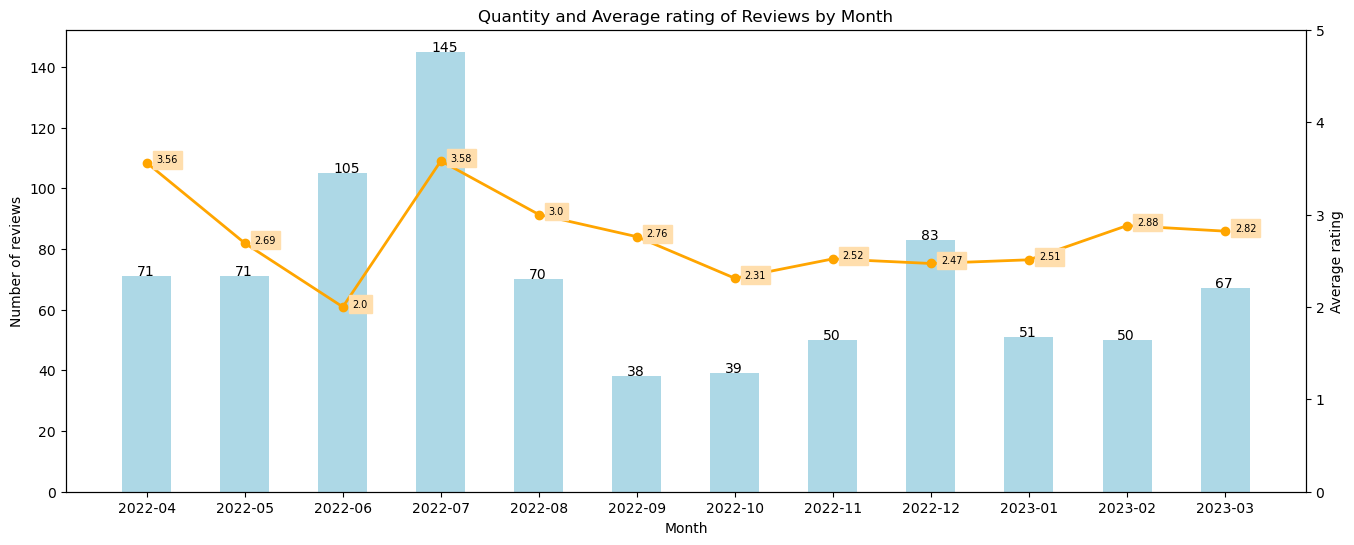

vib1 + ios:


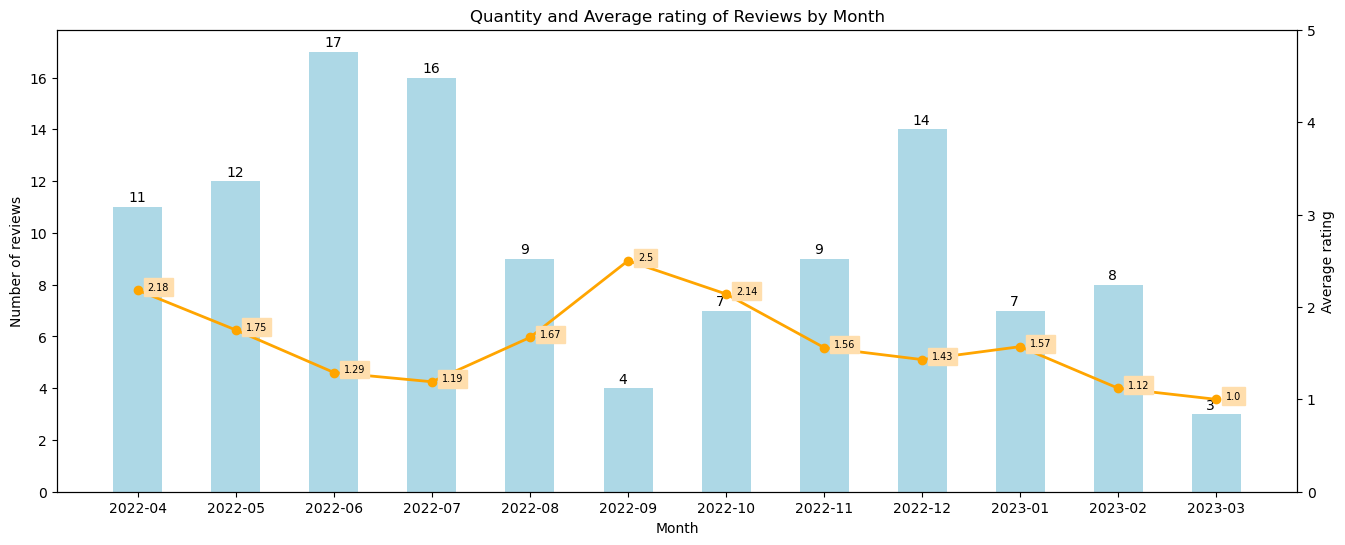

vib2 + android:


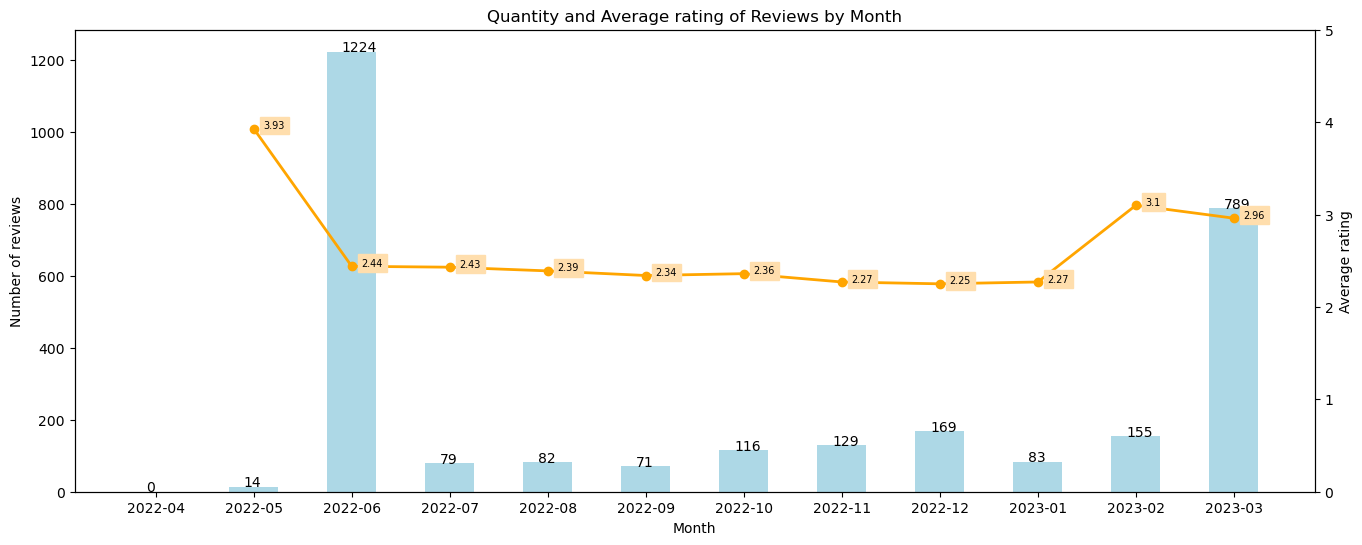

vib2 + ios:


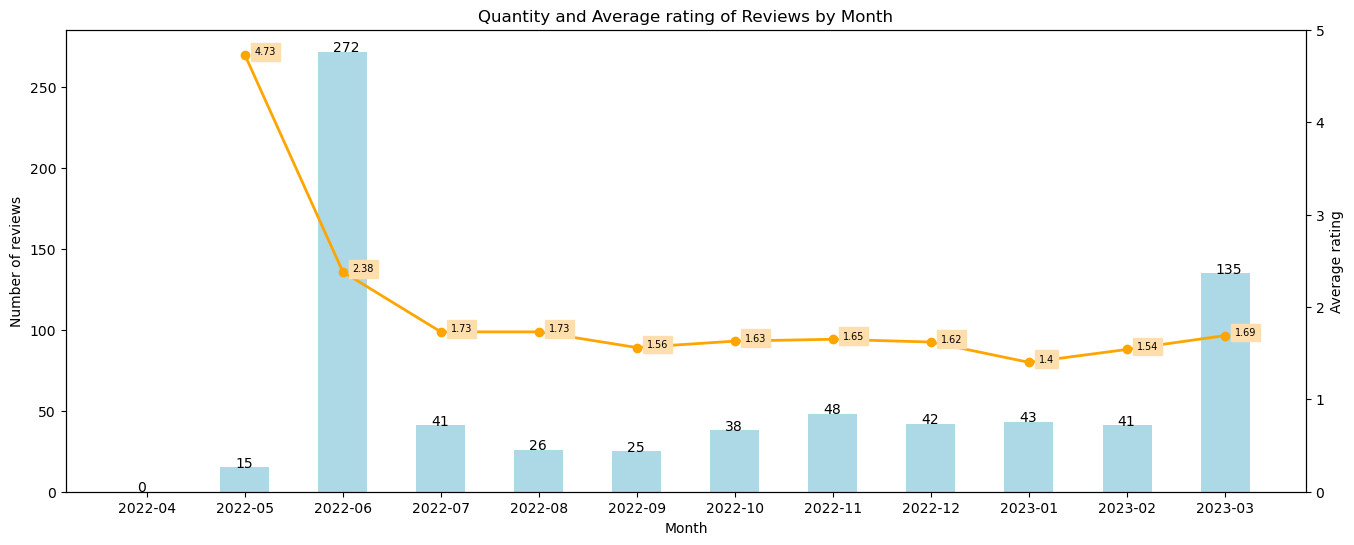

In [19]:

for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        print(f"{bankapp} + {platform}:")
        df = df_review[(df_review['platform']==platform)&(df_review['bankapp']==bankapp)]
        
        #Calculate number of review and average rating by month
        df_mon = df.groupby('date_my').agg({'review':'count','rating':'mean'}).reset_index().sort_values('date_my', ascending=True)
        df_mon = df_mon.tail(12)
        #print(df_mon)
        if df_mon.shape[0]==12: 
            MONTH_LIST = df_mon['date_my'].values
        else:
            #MON_MATCHED = np.intersect1d(df_mon['date_my'].values,MONTH_LIST)   [float(nan)]*len(MON_MISS) np.zeros(len(MON_MISS))
            MON_MISS = [i for i in MONTH_LIST if i not in df_mon['date_my'].values]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'review':np.zeros(len(MON_MISS)),'rating':[float(nan)]*len(MON_MISS)})
            df_mon = pd.concat([df_mon, df_miss])
            df_mon = df_mon.sort_values('date_my', ascending=True).reset_index(drop=True)

        df_mon['rating'] = df_mon['rating'].apply(lambda x: '{0:.2f}'.format(x))
        #print(df_mon)
        #sys.exit()

        month = df_mon['date_my'].values
        #review_count = df_mon['review'].values
        review_count = df_mon['review'].astype(int).values
        rating_avg = df_mon['rating'].values

        X_month = np.arange(len(month))

        fig, ax1 = plt.subplots(figsize=(16,6))
        ax2 = ax1.twinx()
        #ax2.set_ybound(lower=0,upper=5)
        ax2.set_ylim([0,5])
        ax1.set_xticks(X_month)

        ax1.bar(month,review_count.astype(int), color='lightblue', label="Number of reviews", width=0.5)
        for x,y in zip(X_month, review_count):
            ax1.annotate('%s' % y, xy=(x-0.1,y+0.2), textcoords='data')

        ax2.plot(month, rating_avg.astype(float), color='orange', label="Average rating", lw=2, marker='o')
        for x,y in zip(X_month, rating_avg.astype(float)):
            ax2.annotate('%s' % y, xy=(x+0.1,y), textcoords='data', backgroundcolor="navajowhite", fontsize=7)

        # ax3.plot(month, neg_sentiment_score.astype(float), color='purple', label="Average Negative Sentiment Score", lw=2, marker='o',markersize=5)#,linestyle='line')
        # for x,y in zip(X_month, neg_sentiment_score.astype(float)):
        #     ax3.annotate('%s' % y, xy=(x+0.1, y-0.1), textcoords='data', backgroundcolor="navajowhite", fontsize=7)


        # addlabels(month, rating_avg.astype(float))
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Number of reviews')
        ax2.set_ylabel('Average rating')
        ax1.set_title("Quantity and Average rating of Reviews by Month")

        fig.savefig(f'image_export/1_review_by_month_barline_{bankapp}_{platform}.png', bbox_inches='tight')
        plt.show()

#### 2) **Pie chart**: %Sharing of rating last 12 monthes

vib1 + android:
vib1 + ios:
vib2 + android:
vib2 + ios:


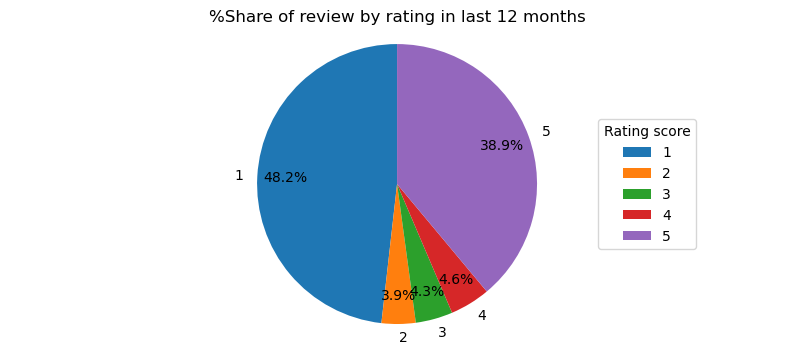

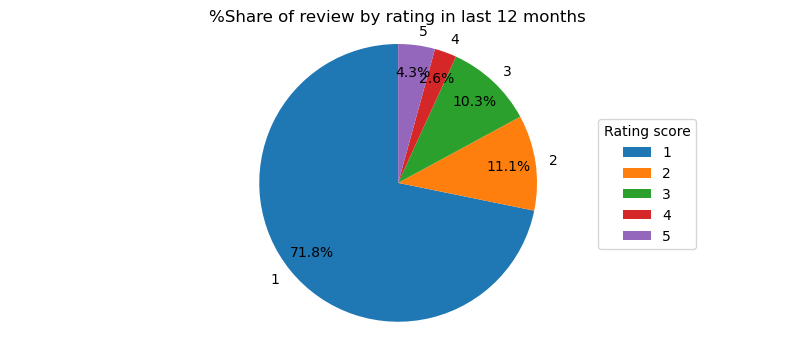

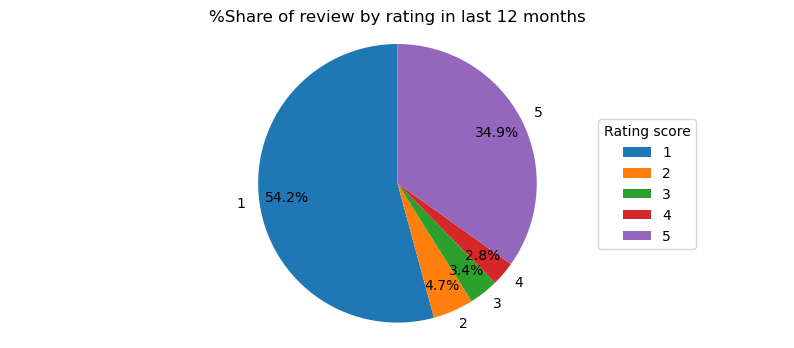

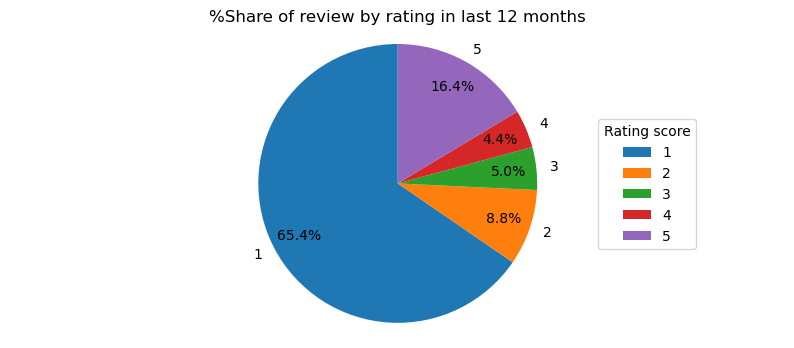

In [20]:
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:

        # bankapp = 'vib2'
        # platform ='ios'
        print(f"{bankapp} + {platform}:")
        df_pie = df_review[(df_review['platform']==platform)&(df_review['bankapp']==bankapp)]
        df_pie = df_pie[(df_pie['date']<TO_DATE)&(df_pie['date']>=FROM_DATE)]
        #print(df_pie.shape)
        df_pie = df_pie.groupby('rating').agg({'username':'count'}).reset_index().rename(columns={'username':'count'})

        for i in range(1,6,1):
            if i not in df_pie['rating'].values:
                df_pie = df_pie.append({'rating': i,'count': 0}, ignore_index=True)
        df_pie.sort_values('rating', ascending=True, inplace=True)

        labels = df_pie['rating'].values
        sizes = df_pie['count'].values

        explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

        fig1, ax1 = plt.subplots(figsize=(10,4))
        wedges, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.8,
                shadow=False, startangle=90)

        ax1.legend(wedges, labels,
                title="Rating score",
                loc="center left",
                bbox_to_anchor=(0.75, 0, 0.5, 1))
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title("%Share of review by rating in last 12 months")

        fig1.savefig(f'image_export/2_percent_share_of_review_rating_score_12m_{bankapp}_{platform}.png', bbox_inches='tight')

### Run **sentiment analysis** + **Topic Modeling** for 3,4,5 report

#### Sentiment Analysis

In [21]:

df_review[df_review['date_my']==LAST_MONTH]

,username,review,date,rating,bankapp,platform,date_my,review_adj
3,Tan To,Update lên vib 2.0. Nhiều tính năng còn thua p...,2023-03-29 17:49:09,1,vib1,android,2023-03,update lên vib nhiều tính năng còn thua phiên ...
4,Ngọc Anh,Kiếm 1.000k free thì vào VAY9 . C0M,2023-03-29 10:10:21,5,vib1,android,2023-03,kiếm free thì vào
5,Sằm Hậu,Tôi không đăng nhập ngân hàng my vib của mình....,2023-03-28 20:16:52,5,vib1,android,2023-03,tôi không đăng nhập ngân hàng my vib của mình ...
6,Hai Ha Phan,Dịch vụ CSKH qua tổng đài quá tệ. Gọi hotline ...,2023-03-28 13:55:53,1,vib1,android,2023-03,dịch vụ cskh qua tổng đài quá tệ gọi hotline b...
7,Thùy Dung BIDV,Kiếm tiền + vay 0% truy cập ( Vay9 . C0M ),2023-03-28 12:38:07,5,vib1,android,2023-03,kiếm tiền vay truy cập
...,...,...,...,...,...,...,...,...
7523,Toàn A2,Khách hàng không muốn nâng cấp lên app mới như...,2023-03-03 13:26:18,1,vib2,ios,2023-03,khách hàng không muốn nâng cấp lên app mới như...
7524,TAT17736638,Vừa mở tk được 1 ngày cái trừ luôn 64k sms ban...,2023-03-03 01:49:15,1,vib2,ios,2023-03,vừa mở tài khoản được ngày cái trừ luôn sms ba...
7525,Kim Hyun Hana,Không hiểu app kiểu gì mà đăng kí mở thẻ onlin...,2023-03-01 15:23:27,1,vib2,ios,2023-03,không hiểu app kiểu gì mà đăng ký mở thẻ onlin...
7526,Hoang Mau,Đầu tiên mình báo cáo nhé. Không có chức năng ...,2023-03-01 12:50:01,1,vib2,ios,2023-03,đầu tiên mình báo cáo nhé không có chức năng c...


In [22]:
# RUN SENTIMENT PREDITION
# for platform in ['android','ios']:
#     for bankapp in ['vib1','vib2']:
#         print(f"{platform} + {bankapp}:")
#         df_pie = df_review[(df_review['platform']==platform)&(df_review['bankapp']==bankapp)]
#         df_pie = df_pie[(df_pie['date']<TO_DATE)&(df_pie['date']>=FROM_DATE)]
#df_w = df_review[(df_review['date']<TO_DATE)&(df_review['date']>=FROM_DATE)]       

df_new = df_review[df_review['date_my']==LAST_MONTH]

df_new = sentiment_prediction(df_new, tfidf_convertor='../sentiment_analysis_external_review_nbank/model/TFIDF_VECTORIZER_app.pk', \
    sentiment_model='../sentiment_analysis_external_review_nbank/model/SENTIMENT_MODEL_sgdr_prob.sav', \
         pred_out_file=f'./data/OUT_review_sentiment_new_{W_MON-1}.csv')
# df_new.to_csv(f'./OUT_df_review_sentiment_new.csv',index=False, encoding='utf-16', sep='\t')

# df = pd.concat([df, df_rw_sent])
# df.to_csv(f'./OUT_review_sentiment.csv',index=False, encoding='utf-16', sep='\t')

There are 994 new reviews


In [23]:
df_new = pd.read_csv(f'./data/OUT_review_sentiment_new_{W_MON-1}.csv',index_col=False, encoding='utf-16', sep='\t')

In [24]:
if (W_MON-2)==0: 
    NUM=12
else:
    NUM=W_MON-2
df = pd.read_csv(f'./data/OUT_review_sentiment_to{NUM}.csv',index_col=False, encoding='utf-16', sep='\t')
df = pd.concat([df,df_new]).reset_index(drop=True)
df.to_csv(f'./data/OUT_review_sentiment_to{W_MON-1}.csv',index=False, encoding='utf-16', sep='\t')

df['date'] = pd.to_datetime(df['date'])
df = df[(df['date']>=FROM_DATE)&(df['date']<TO_DATE)]
df.shape


(4731, 18)

In [25]:
# dfxx = pd.read_csv('./OUT_review_sentiment.csv',index_col=False, encoding='utf-16', sep='\t')
# dfxx['date']=pd.to_datetime(dfxx['date'])
# #dfxx
# #.read_csv(f"./data/INPUT_app_data_{TO_DATE.month-2}.csv", index_col=False, encoding='utf-16', sep='\t')
# dfxx[dfxx['date']<datetime.datetime(2022,10,1)].to_csv(f"./data/OUT_review_sentiment_to{TO_DATE.month-2}.csv", index=False, encoding='utf-16', sep='\t')
# dfxx[dfxx['date']>=datetime.datetime(2022,10,1)].to_csv(f"./data/OUT_review_sentiment_new_{TO_DATE.month-1}.csv", index=False, encoding='utf-16', sep='\t')

In [26]:
#df = pd.read_csv(f'./OUT_review_sentiment.csv',index_col=False, encoding='utf-16', sep='\t')

In [27]:
# PARAMETER
TOPIC_MODEL_PATH = '../review_topic_modeling/model/release_2022_10_03/'
#REVIEW_FILE_PATH = "./OUT_sentiment_prediction.csv"

#df = pd.read_csv(REVIEW_FILE_PATH, encoding='utf-16', sep='\t',index_col=False)
df['sentiment'] =  df['sentiment'].apply(lambda x: 0 if x<0 else 1 if x>1 else x)
df['neg_review'] = df['sentiment'].apply(lambda x: 1 if x>=0.5 else 0)
df['pos_sentiment'] = df['sentiment'].apply(lambda x: x if x<0.5 else 0)
#df['sentiment'] = np.round(df['sentiment'].values,2)
print(df.columns.values)
print(df.shape)
df.head(1)


['username' 'review' 'date' 'rating' 'bankapp' 'platform' 'date_my'
 'review_adj' 'negative_word' 'positive_word' 'flag_posword'
 'flag_negword' 'label_negword' 'review_en' 'review_clean' 'review_empty'
 'vader_compound' 'sentiment' 'neg_review' 'pos_sentiment']
(4731, 20)


,username,review,date,rating,bankapp,platform,date_my,review_adj,negative_word,positive_word,flag_posword,flag_negword,label_negword,review_en,review_clean,review_empty,vader_compound,sentiment,neg_review,pos_sentiment
0,huu bui,Muốn mơ tai khoan vib luôn cho căn cước mô dc dk,2022-09-29 11:12:54,4,vib1,android,2022-09,muốn mơ tai khoan vib luôn cho căn cước mô đượ...,0,0,0,0,0,want to have a vib earphone for registered tis...,want earphone register tissue id,0,0,0.200364,0,0.200364


##### Sentimental Analysis Overview

In [28]:
# df_w['date_my']

vib1 + android:


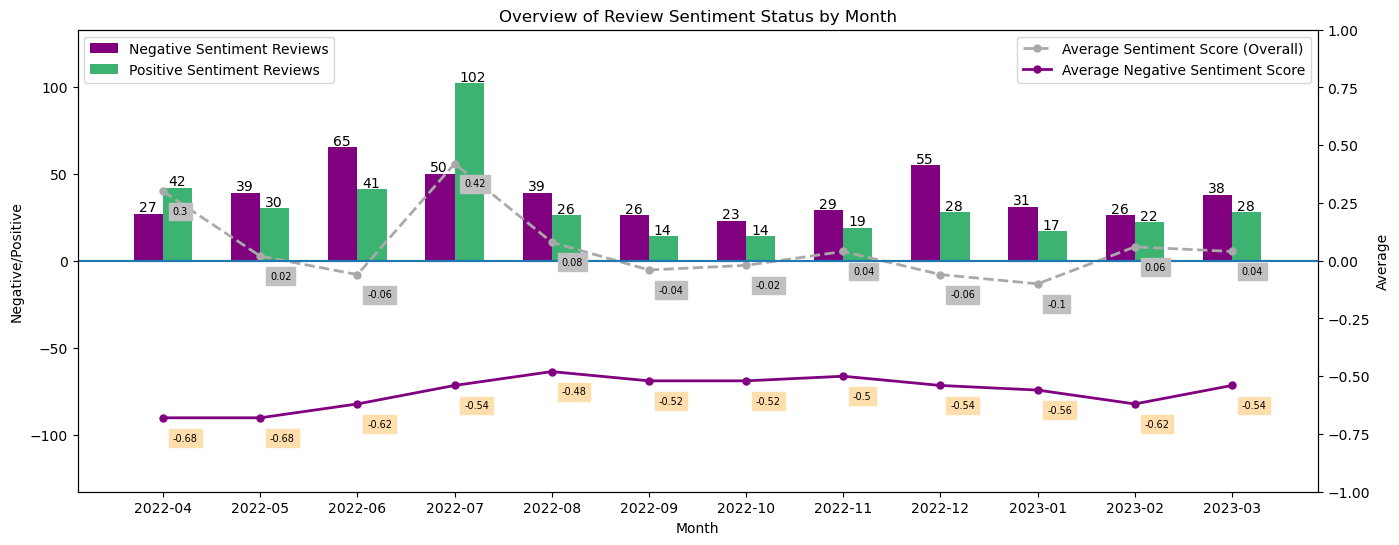

vib1 + ios:


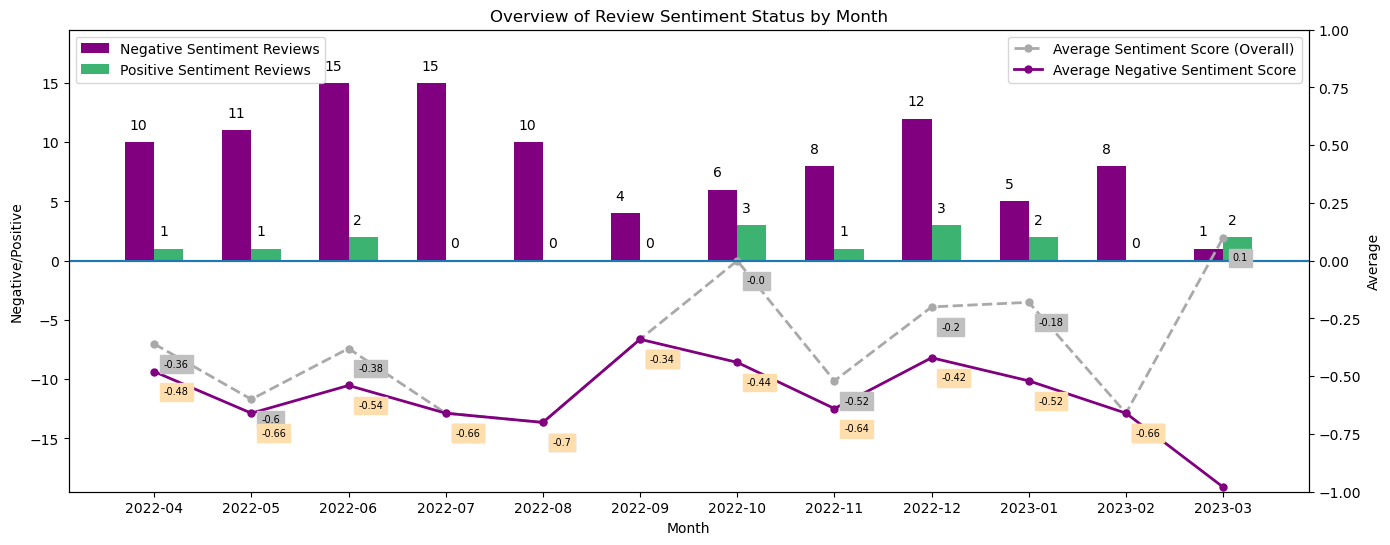

vib2 + android:


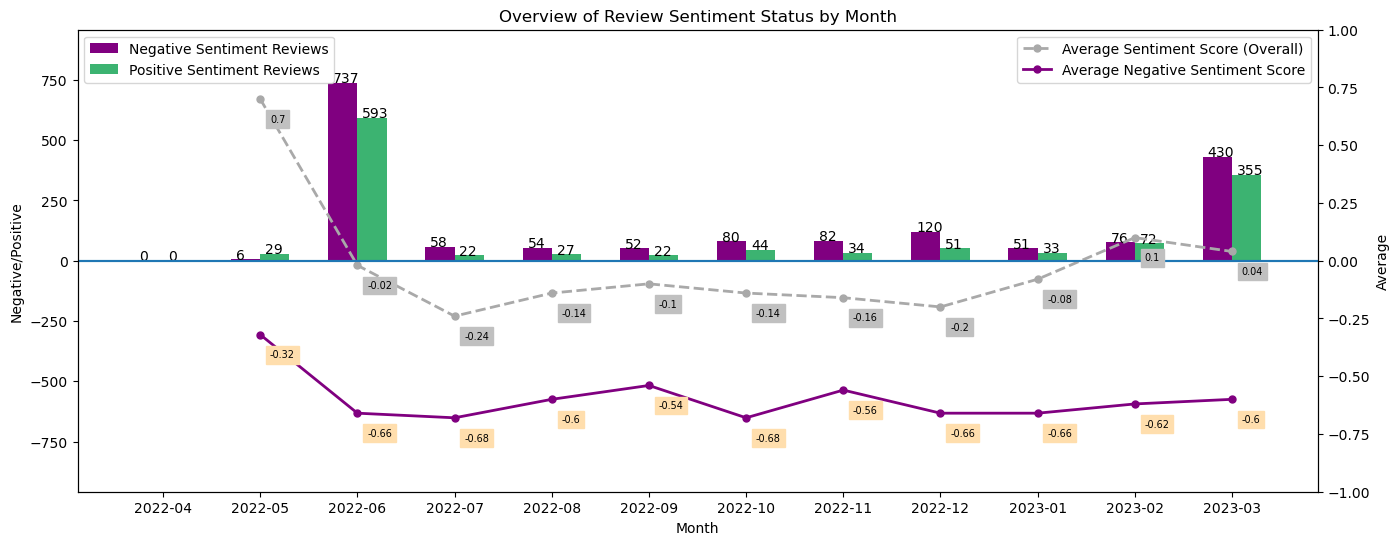

vib2 + ios:


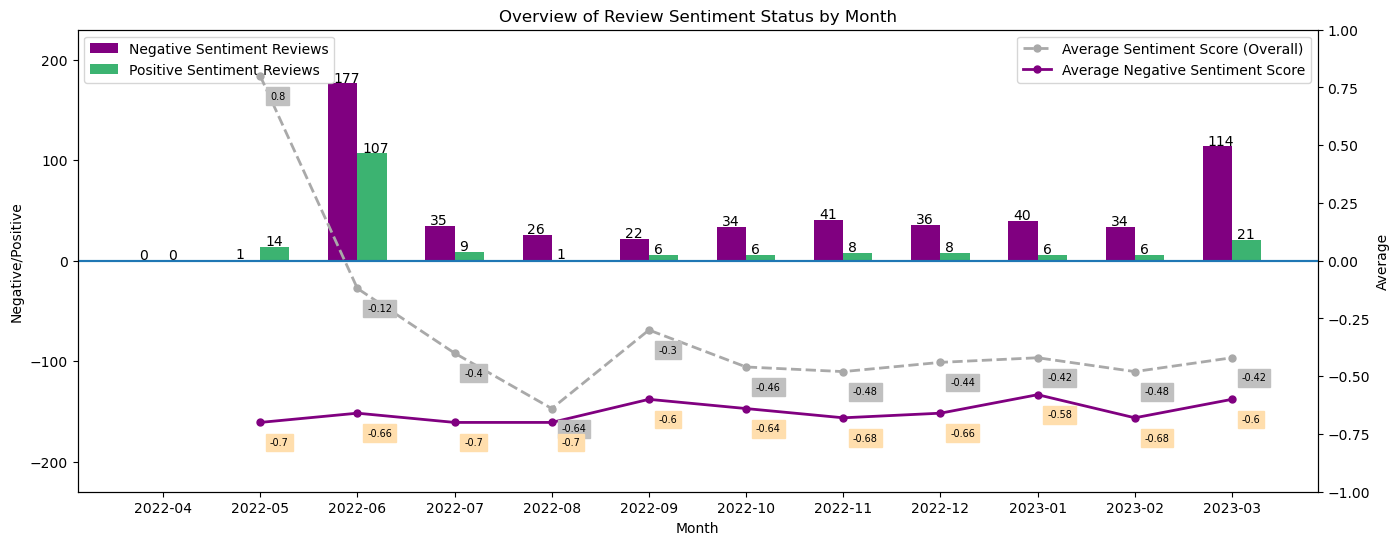

In [29]:
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        print(f"{bankapp} + {platform}:")
        # bankapp='vib2'
        # platform='ios'
        df_w = df[(df['platform']==platform)&(df['bankapp']==bankapp)]

        df_mon = df_w.groupby(['date_my']).agg({'review':'count','sentiment':'sum','neg_review':'sum'}).reset_index().sort_values('date_my', ascending=True)
        #df_mon.sort_values('date_my', ascending=True)

        df_mon = df_mon.tail(12)
        #print(df_mon)
        #sys.exit()
        if df_mon.shape[0]!=12: 
            #MON_MATCHED = np.intersect1d(df_mon['date_my'].values,MONTH_LIST)
            MON_MISS = [i for i in MONTH_LIST if i not in df_mon['date_my'].values]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'review':np.zeros(len(MON_MISS)),\
                'sentiment':np.zeros(len(MON_MISS)), 'neg_review':np.zeros(len(MON_MISS))})
            df_mon = pd.concat([df_mon, df_miss])
            df_mon = df_mon.sort_values('date_my', ascending=True).reset_index(drop=True)
           
        df_mon['num_pos_review'] = df_mon['review'] - df_mon['neg_review']
        #df_mon['sentiment_avg'] = df_mon.applymap(lambda x: 0 if x['review'].isnull() else x['sentiment']/x['review'])
        df_mon['sentiment_avg'] = df_mon['sentiment']/df_mon['review']        
        #df_mon['sentiment_avg'] = df_mon['sentiment_avg'].fillna(0.5)
        df_mon['sentiment_avg'] = df_mon['sentiment_avg'].apply(lambda x: '{:.02f}'.format(x))
        df_mon['sentiment_score'] = df_mon['sentiment_avg'].apply(lambda x: '{:.02f}'.format(-2*(float(x)-0.5))) 

        #print(df_mon)
        ##################################
        # negative sentiment
        df_w2 = df_w[(df_w['sentiment']>=0.5)]        
        #print(df_w2)
        df_mon2 = df_w2.groupby(['date_my']).agg({'review':'count','sentiment':'sum','neg_review':'sum'}).reset_index().sort_values('date_my', ascending=True)
        
        #df_mon.sort_values('date_my', ascending=True)

        df_mon2 = df_mon2.tail(12)
        # print(df_mon2)
        if df_mon2.shape[0]!=12: 
            #MON_MATCHED = np.intersect1d(df_mon['date_my'].values,MONTH_LIST)
            MON_MISS = [i for i in MONTH_LIST if i not in df_mon2['date_my'].values]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'review':np.zeros(len(MON_MISS)),\
                'sentiment':np.zeros(len(MON_MISS)), 'neg_review':np.zeros(len(MON_MISS))}) #[float(nan)]*len(MON_MISS)
            df_mon2 = pd.concat([df_mon2, df_miss])
            df_mon2 = df_mon2.sort_values('date_my', ascending=True).reset_index(drop=True)

        month = df_mon2['date_my'].values
        df_mon2['neg_sentiment_avg'] = df_mon2['sentiment']/df_mon2['review']
        #df_mon['neg_sentiment_avg'] = df_mon['neg_sentiment_avg'].fillna(0.5)
        df_mon2['neg_sentiment_avg'] = df_mon2['neg_sentiment_avg'].apply(lambda x: '{:.02f}'.format(x))
        df_mon2['neg_sentiment_score'] = df_mon2['neg_sentiment_avg'].apply(lambda x: '{:.02f}'.format(-2*(float(x)-0.5))) 
        #######################################

        df_mon['neg_sentiment_score'] = df_mon2['neg_sentiment_score'].values
        # print(df_mon)

        import mpl_axes_aligner

        neg_sentiment = df_mon['neg_review'].astype(int).values
        pos_sentiment = df_mon['num_pos_review'].astype(int).values
        sentiment_score = df_mon['sentiment_score'].values
        neg_sentiment_score = df_mon['neg_sentiment_score'].values
        sentiment_count_range = max(np.concatenate([pos_sentiment,neg_sentiment]))

        X_month = np.arange(len(month))


        fig, ax1 = plt.subplots(figsize=(16,6))
        ax1.set_xticks(X_month, labels=month)
        ax3 = ax1.twinx()
        
        # print(neg_sentiment.astype(int))
        # print(X_month)
        # print(month)
        #ax3.spines.right.set_position(("axes", 1.2))
        #mpl_axes_aligner.align.yaxes(ax1, 0, ax2, 0, 0.5)
        ax1.bar(X_month-0.15, neg_sentiment.astype(int), color='purple', label="Negative Sentiment Reviews", width=0.3)
        for x,y in zip(X_month, neg_sentiment):
            ax1.annotate('%s' % y, xy=(x-0.25,y+1.1), textcoords='data')

        ax1.bar(X_month+0.15, pos_sentiment.astype(int), color='mediumseagreen', label="Positive Sentiment Reviews", width=0.3)
        for x,y in zip(X_month, pos_sentiment):
            ax1.annotate('%s' % y, xy=(x+0.05,y+1.1), textcoords='data')

        ax3.plot(X_month, sentiment_score.astype(float), color='darkgray', label="Average Sentiment Score (Overall)", lw=2, marker='o',markersize=5, linestyle='dashed')
        for x,y in zip(X_month, sentiment_score.astype(float)):
            ax3.annotate('%s' % y, xy=(x+0.1, y-0.1), textcoords='data', backgroundcolor="silver", fontsize=7)

        ax3.plot(X_month, neg_sentiment_score.astype(float), color='purple', label="Average Negative Sentiment Score", lw=2, marker='o',markersize=5)#,linestyle='line')
        for x,y in zip(X_month, neg_sentiment_score.astype(float)):
            ax3.annotate('%s' % y, xy=(x+0.1, y-0.1), textcoords='data', backgroundcolor="navajowhite", fontsize=7)

        ax1.axhline(0)
        ax3.axhline(0)

        ax1.set_ylim(-sentiment_count_range*1.3, sentiment_count_range*1.3)
        ax3.set_ylim(-1, 1)


        ax1.set_xlabel('Month')
        ax1.set_ylabel('Negative/Positive')

        ax3.set_ylabel('Average')
        ax1.set_title("Overview of Review Sentiment Status by Month")
        ax1.legend(loc=2)
        ax3.legend(loc=1)

        fig.savefig(f'image_export/1_sentiment_by_month_barline_{bankapp}_{platform}.png', bbox_inches='tight')
        plt.show()

#### Topic Modeling

In [30]:
from bertopic import BERTopic

from sentence_transformers import SentenceTransformer
from nltk import pos_tag
import sklearn.manifold
import random
random.seed(42)

import yaml
from yaml.loader import SafeLoader

stopwords = global_materials.stopwords
exclude_stopwords = {"app"}
stopwords -= exclude_stopwords

In [31]:
# file = "../sentiment_analysis_external_review_nbank/data/train/5_dataApp_EN_clean_vader.csv"
# #file = "4_dataApp_EN_2022-09-23.csv"
# df_pred = pd.read_csv(PRED_ROOT+file,index_col=False, sep='\t')

df['review_en'] = df['review_en'].apply(lambda x: re.sub(r'[^\w\s,]','', str(x)))
df_tp = df[df['rating']<3] # classify to topic for negative review only

print(f'Number of Negative review in this month is: {df_tp.shape[0]}')

df_tp['review_en'] = df_tp['review_en'].apply(lambda x: str(x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('\'ll',' will', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('don\'t','do not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('can\'t','can not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('hasn\'t','has not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('wasn\'t','was not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('won\'t','will not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('cant','can not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('dont','do not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('hadn\'t','had not', x))
df_tp['review_en'] = df_tp['review_en'].apply(lambda x: re.sub('cannot','can not', x))


print(df_tp['review_en'].values[:3])

Number of Negative review in this month is: 2804
['No registration only login'
 'scam customers to take personal information digitally sign contracts online xg neither approve nor send email to cancel records even though it has been reported to an unreliable banking hotline'
 'Banks do not support loans directly on the app too bad compared to many other banks']


In [32]:
topic_model = BERTopic.load(TOPIC_MODEL_PATH+"bertopic_model_weights.h5")

with open(TOPIC_MODEL_PATH+'topic_dict.yaml') as f:
    topic_dict = yaml.load(f, Loader=SafeLoader)

pred_rs = topic_model.transform(df_tp['review_en'].values)
df_tp['topic'] = pred_rs[0]

df_tp['topic_content'] = df_tp['topic'].apply(lambda x: '_'.join(topic_dict[x]) if (topic_dict[x]!='outlier') else topic_dict[x])
#df_pred[['review','review_adj','review_en','topic','topic_content']].to_csv(PRED_ROOT+'/ext_review_topic_OUT.csv', encoding='utf-16', index=False, sep='\t')

df_topic_lookup = pd.read_csv(TOPIC_MODEL_PATH+"topic_lookup.csv", index_col=False)
gtopic_lookup_dict = dict(zip(df_topic_lookup["topic"], df_topic_lookup["gtopic_content"]))

df_tp['gtopic_content'] = df_tp['topic'].apply(lambda x: gtopic_lookup_dict[x])
df_tp.to_csv("./OUTPUT_topic_modeling.csv", index=False, encoding='utf-16', sep='\t')

# summary topic result 
df_topic_top = df_tp.groupby(['topic','topic_content'])['review'].count().sort_values(ascending=False).reset_index()
#print(df_topic_top[:5])
df_topic_top.to_csv('./OUT_pred_topic_result_summary.csv', index=False)
topic_arr = df_topic_top['topic'].values
print(f"Successful Topic distribution rate: {(df_topic_top['review'].sum()-df_topic_top.loc[df_topic_top['topic']==-1,'review'].values[0])/df_topic_top['review'].sum()}")

Batches:   0%|          | 0/88 [00:00<?, ?it/s]

Successful Topic distribution rate: 0.6579885877318117


#### 3) **Table**: Bad Review (<3) - Count

In [33]:
import dataframe_image as dfi
import seaborn as sns
cm = sns.light_palette("darkcyan", as_cmap=True)


In [34]:
#df_rate3 = df[df['rating']<3]
df_tp.sort_values('date_my', ascending=True, inplace=True)
df_tp['value'] = np.ones(df_tp.shape[0]).astype(int)
print(df_tp.shape)
df_tp.head(1)

(2804, 24)


,username,review,date,rating,bankapp,platform,date_my,review_adj,negative_word,positive_word,...,review_clean,review_empty,vader_compound,sentiment,neg_review,pos_sentiment,topic,topic_content,gtopic_content,value
4855,kasper paolo,Lỗi thường xuyên trên APP cũng như hệ thống ng...,2022-04-23 03:21:01,1,vib1,ios,2022-04,lỗi thường xuyên trên app cũng như hệ thống ng...,2,0,...,frequent error well bank system not want use a...,0,1,0.949628,1,0.0,-1,outlier,Considering topics,1


In [35]:
df_tp = df_tp.rename(columns={'gtopic_content':'Topics'})
df_tp.columns.values

array(['username', 'review', 'date', 'rating', 'bankapp', 'platform',
       'date_my', 'review_adj', 'negative_word', 'positive_word',
       'flag_posword', 'flag_negword', 'label_negword', 'review_en',
       'review_clean', 'review_empty', 'vader_compound', 'sentiment',
       'neg_review', 'pos_sentiment', 'topic', 'topic_content', 'Topics',
       'value'], dtype=object)

In [36]:
df_w['date_my'].nunique()

11

In [37]:
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        print(f"{platform} + {bankapp}:")
        df_w = df_tp[(df_tp['platform']==platform)&(df_tp['bankapp']==bankapp)]

        if (df_w['date_my'].nunique())!=12: 
            MON_MISS = [i for i in MONTH_LIST if i not in df_w['date_my'].unique()]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'Topics':'Considering topics',\
                'value':-1*np.ones(len(MON_MISS))})
            df_w = pd.concat([df_w, df_miss])
            df_w = df_w.sort_values('date_my', ascending=True).reset_index(drop=True)       

        df_tp_pivot_3 = pd.pivot_table(df_w, values='value', index=['Topics'], columns=['date_my'], aggfunc=np.sum).reset_index()

        df_tp_pivot_3 = df_tp_pivot_3.replace(to_replace = np.nan, value = -1)

        column = df_tp_pivot_3.columns.values
        column_month = [col for col in column if col!='Topics']
        print(column_month)

        max_val = np.max(df_tp_pivot_3[column_month].values)
        min_val = 1
        cm = sns.light_palette("#2a3d75", reverse=False,as_cmap=True)

        dfi.export(df_tp_pivot_3.style.background_gradient(axis=None,cmap=cm, subset=column_month, vmin=min_val, vmax=0.5*max_val)  \
                    .set_properties(subset=['Topics'],**{'width': '300px','font-size': '9pt'},**{'text-align': 'left'}) \
                    .set_properties(subset=column_month,**{'width': '60px','font-size': '9pt'}) \
                    .set_caption("Review count by month (Rating<3)") \
                    .hide(axis='index') \
                    .applymap(lambda x: 'color: transparent' if x==-1 else '')
                    .format(precision=0),f'./image_export/3_valid_reviews_by_month_table_{bankapp}_{platform}.png')

        

android + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
android + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']


#### 4) **Table**: Average Rating

In [38]:
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        print(f"{platform} + {bankapp}:")
        df_w = df_tp[(df_tp['platform']==platform)&(df_tp['bankapp']==bankapp)]

        if (df_w['date_my'].nunique())!=12:  
            MON_MISS = [i for i in MONTH_LIST if i not in df_w['date_my'].unique()]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'Topics':'Considering topics',\
                'rating': -1*np.ones(len(MON_MISS))})
            df_w = pd.concat([df_w, df_miss])
            df_w = df_w.sort_values('date_my', ascending=True).reset_index(drop=True)        
     
        df_tp_pivot_4 = pd.pivot_table(df_w, values='rating', index=['Topics'], columns=['date_my'], aggfunc=np.mean).reset_index()

        df_tp_pivot_4 = df_tp_pivot_4.replace(to_replace = np.nan, value = -1)

        column = df_tp_pivot_4.columns.values
        column_month = [col for col in column if col!='Topics']
        print(column_month)

        max_val = np.max(df_tp_pivot_4[column_month].values)
        min_val = 0.5
        cm = sns.light_palette("#2a3d75", reverse=False, as_cmap=True)

        dfi.export(df_tp_pivot_4.style.background_gradient(axis=None,cmap=cm, subset=df_tp_pivot_4.columns.values[1:],vmin=min_val, vmax=max_val)  \
                    .set_properties(subset=['Topics'],**{'width': '300px','font-size': '9pt'},**{'text-align': 'left'}) \
                    .set_properties(subset=column_month,**{'width': '60px','font-size': '9pt'}) \
                    .set_caption("Average Review Rating by month (Rating<3)") \
                    .hide(axis='index') \
                    .applymap(lambda x: 'color: transparent' if x==-1 else '')
                    .format(precision=2),f'./image_export/4_valid_reviews_by_month_table_{bankapp}_{platform}.png')

df_tp_pivot_4

android + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
android + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']


date_my,Topics,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03
0,1. App Quality Complaint (slow/lag/bad experie...,-1.0,-1.0,1.088889,1.000000,1.000000,1.0,1.111111,1.166667,1.222222,1.2,1.00,1.142857
1,2. App Error Complaint,-1.0,-1.0,1.000000,-1.000000,-1.000000,1.0,1.000000,2.000000,-1.000000,1.0,1.00,1.000000
2,3. eKYC registration issues (eg. Face/IDCard s...,-1.0,-1.0,1.000000,-1.000000,1.000000,1.0,1.000000,1.000000,-1.000000,1.0,-1.00,1.000000
3,4. Login App/smart OTP issues,-1.0,-1.0,1.153846,1.000000,1.000000,1.0,1.500000,1.000000,1.333333,1.0,1.25,1.181818
4,5. Money Transfer (can't transfer/slow transfe...,-1.0,-1.0,1.250000,1.400000,1.000000,1.0,1.500000,1.000000,1.000000,1.0,1.00,1.133333
5,6. Topup/Bill payment issues,-1.0,-1.0,1.000000,-1.000000,-1.000000,-1.0,1.000000,1.000000,-1.000000,1.0,2.00,-1.000000
6,"7. Complaints relating to Reward Program, Paym...",-1.0,-1.0,1.000000,1.000000,-1.000000,1.0,1.000000,-1.000000,-1.000000,-1.0,-1.00,-1.000000
7,8. Card issues,-1.0,-1.0,1.000000,1.000000,1.000000,1.0,1.000000,1.125000,1.000000,1.0,1.00,1.000000
8,9. Supporting staff complaint,-1.0,-1.0,1.000000,-1.000000,-1.000000,1.0,-1.000000,-1.000000,-1.000000,1.0,-1.00,-1.000000
9,Considering topics,-1.0,2.0,1.122807,1.307692,1.285714,1.0,1.181818,1.062500,1.190476,1.0,1.00,1.232558


#### 5) **Table**: Average Sentiment Score

In [39]:
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        print(f"{platform} + {bankapp}:")
        df_w = df_tp[(df_tp['platform']==platform)&(df_tp['bankapp']==bankapp)]

        if df_w.shape[0]!=12: 
            MON_MISS = [i for i in MONTH_LIST if i not in df_w['date_my'].unique()]
            df_miss = pd.DataFrame(data={'date_my':MON_MISS,'Topics':'Considering topics',\
                'sentiment':-0.5*np.ones(len(MON_MISS))})
            df_w = pd.concat([df_w, df_miss])
            df_w = df_w.sort_values('date_my', ascending=True).reset_index(drop=True)     


        #df_tp_5 = df_tp[df_tp['date_my'].isin(MONTH_LIST)]
        #df_tp_5.sort_values('date_my', ascending=True, inplace=True)
        df_w['sentiment_proba'] = df_w['sentiment'].apply(lambda x: -2*(x-0.5))

        df_tp_pivot_5 = pd.pivot_table(df_w, values='sentiment_proba', index=['Topics'], columns=['date_my'], aggfunc=np.mean).reset_index()
        df_tp_pivot_5 = df_tp_pivot_5.replace(to_replace = np.nan, value = 2)

        column = df_tp_pivot_5.columns.values
        column_month = [col for col in column if col!='Topics']
        print(column_month)

        max_val = np.max(df_tp_pivot_5[column_month].values)
        min_val = -1
        cm = sns.light_palette("#4f3355", reverse=True,as_cmap=True)

        dfi.export(df_tp_pivot_5.style.background_gradient(axis=None,cmap=cm, subset=df_tp_pivot_5.columns.values[1:],vmin=-1, vmax=0)  \
                        .set_properties(subset=['Topics'],**{'width': '300px','font-size': '9pt'},**{'text-align': 'left'}) \
                        .set_properties(subset=column_month,**{'width': '60px','font-size': '9pt'}) \
                        .set_caption("Average Sentiment Score by topics following months (Rating<3)") \
                        .hide(axis='index') \
                        .applymap(lambda x: 'color: transparent' if x==2 else '')            
                        .format(precision=2),f'./image_export/5_sentiment_rating_by_topic_month_table_{bankapp}_{platform}.png'
                        )
    

android + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib1:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
android + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']
ios + vib2:
['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03']


#### Dashboard Exporting in Excel

In [40]:
df_overview

,platform,bankapp,Total Reviews,AVG Rating,review,AVG Rating in 12 months
0,android,vib1,3573,3.44,840,2.82
1,android,vib2,2911,2.59,2911,2.59
2,ios,vib1,846,3.16,117,1.56
3,ios,vib2,726,1.98,726,1.98


In [41]:
df_overview.loc[(df_overview['bankapp']=='vib1')&(df_overview['platform']=='android')]['Total Reviews'].values[0]

3573

In [42]:
def print_ExcelColString(n):
     
    arr = [0] * 10000
    i = 0
 
    # Step 1: Converting to number
    # assuming 0 in number system
    while (n > 0):
        arr[i] = n % 26
        n = int(n // 26)
        i += 1
         
    #Step 2: Getting rid of 0, as 0 is
    # not part of number system
    for j in range(0, i - 1):
        if (arr[j] <= 0):
            arr[j] += 26
            arr[j + 1] = arr[j + 1] - 1
 
    COL_EXCEL = []
    for j in range(i, -1, -1):
        if (arr[j] > 0):
            COL_EXCEL.append(chr(ord('A') + (arr[j] - 1)))

    return ''.join(COL_EXCEL)
    
result = print_ExcelColString(30) 
result
 

'AD'

In [43]:
import xlsxwriter

INIT_ROW = 10
OFFSET_ARR = [25,25,21,17,17,17]
OFFSET_ARRX = []
for i in np.arange(len(OFFSET_ARR)):
    OFFSET_ARRX.append(sum(OFFSET_ARR[:i+1]))

sheet_name = {'vib1':'4 (1.0)','vib1':'4 (1.0) ios','vib2':'4 (2.0)','vib2':'4 (2.0) ios'}
title_dict = {'android':'ANDROID','ios':'     IOS'}

################################################

# Create an new Excel file and add a worksheet.
workbook = xlsxwriter.Workbook('./report/external_reviews_monthly_report.xlsx')
count = 0
for bankapp in ['vib1','vib2']:
    for platform in ['android','ios']:
        count+=1
        worksheet = workbook.add_worksheet(f'4-{count}')

        # Title
        format_00 = workbook.add_format({'bg_color': '#FFFFFF', 
                                        'bold':True,
                                        'font_size': 20,
                                        'font_color':'#000000'})
        worksheet.conditional_format(f'B2', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format_00})
        worksheet.write('B2', 'SENTIMENT', format_00)

        # PLATFORM 
        format_01 = workbook.add_format({'bg_color': '#3399FF', 
                                        'bold':True,
                                        'font_size': 15,
                                        'font_color':'#FFFFFF'})

        worksheet.conditional_format(f'I3:K3', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format_01})
        
        worksheet.write('I3', f'           {title_dict[platform]}', format_01)

        # GENERAL METRICS NAME
        format_02 = workbook.add_format({'bg_color': '#FFFFFF', 
                                        'bold':True,
                                        'font_size': 13,
                                        'font_color':'#000000'})

        worksheet.conditional_format(f'A5:Z5', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format_02})

        worksheet.write('F5', 'Total Reviews', format_02)
        worksheet.write('J5', 'AVG Rating', format_02)
        worksheet.write('M5', 'AVG Rating in 12M', format_02)

        # GENERAL METRICS NAME
        total_review = df_overview.loc[(df_overview['bankapp']==bankapp)&(df_overview['platform']==platform)]['Total Reviews'].values[0]
        avg_rating = df_overview.loc[(df_overview['bankapp']==bankapp)&(df_overview['platform']==platform)]['AVG Rating'].values[0]
        avg_rating_12m = df_overview.loc[(df_overview['bankapp']==bankapp)&(df_overview['platform']==platform)]['AVG Rating in 12 months'].values[0]

        worksheet.write('F7', total_review, format_02)
        worksheet.write('J7', avg_rating, format_02)
        worksheet.write('M7', avg_rating_12m, format_02)

        #worksheet.write(row, 1, '=SUM(B1:B4)')

        # Widen the first column to make the text clearer.
        worksheet.set_column('A:A', 2)
        worksheet.set_column('T:T', 4)
        # worksheet.set_column('B:B', 80)

        # Insert an image.
        #worksheet.write('A8', 'Insert an image in a cell:')
        worksheet.insert_image(f'B{INIT_ROW}', f'./image_export/1_review_by_month_barline_{bankapp}_{platform}.png', {'x_offset': 25, 'y_offset': 0, 'x_scale': 0.85, 'y_scale': 0.90})
        worksheet.insert_image(f'B{INIT_ROW+OFFSET_ARRX[0]}', f'./image_export/1_sentiment_by_month_barline_{bankapp}_{platform}.png', {'x_offset': 20, 'y_offset': 0, 'x_scale': 0.85, 'y_scale': 0.90})
        worksheet.insert_image(f'B{INIT_ROW+OFFSET_ARRX[1]}', f'./image_export/2_percent_share_of_review_rating_score_12m_{bankapp}_{platform}.png', {'x_offset': 140, 'y_offset': 0, 'x_scale': 1.1, 'y_scale': 1.1})

        worksheet.insert_image(f'B{INIT_ROW+OFFSET_ARRX[2]}', f'./image_export/3_valid_reviews_by_month_table_{bankapp}_{platform}.png', {'x_offset': 15, 'y_offset': 0})#, {'x_scale': 0.5, 'y_scale': 0.5})
        worksheet.insert_image(f'B{INIT_ROW+OFFSET_ARRX[3]}', f'./image_export/4_valid_reviews_by_month_table_{bankapp}_{platform}.png', {'x_offset': 15, 'y_offset': 0})#, {'x_scale': 0.5, 'y_scale': 0.5}) #
        worksheet.insert_image(f'B{INIT_ROW+OFFSET_ARRX[4]}', f'./image_export/5_sentiment_rating_by_topic_month_table_{bankapp}_{platform}.png', {'x_offset': 15, 'y_offset': 0})#, {'x_scale': 0.5, 'y_scale': 0.5})

        format1 = workbook.add_format({'bg_color': '#C8C8C8'})
        format2 = workbook.add_format({'bg_color': '#FFFFFF'})

        # Part1: Platform name + general info
        worksheet.conditional_format(f'B4:T{INIT_ROW-2}', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format2})
        # Part2: 2 overview bar+line graph
        worksheet.conditional_format(f'B{INIT_ROW-1}:T{INIT_ROW+OFFSET_ARRX[1]-1}', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format1})
        # Part3: Pie chart
        worksheet.conditional_format(f'B{INIT_ROW+OFFSET_ARRX[1]}:T{INIT_ROW+OFFSET_ARRX[2]-2}', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format2})
        # Part4: 3 last tables of topics
        worksheet.conditional_format(f'B{INIT_ROW+OFFSET_ARRX[2]-1}:T{INIT_ROW+OFFSET_ARRX[5]}', {'type': 'cell',     
                                                'criteria': 'between',
                                                'minimum': 0,
                                                'maximum': 0,
                                                'format': format1})

        #sys.exit()

workbook.close()

In [44]:
print(f"{today}: Congratulation! The report is exported successfully! :D")

2023-04-03: Congratulation! The report is exported successfully! :D


### END
-----------------------------------------------------------------------------------